# Рубежный контроль №1
## Терентьев В.О. Группа ИУ5-63Б
### Вариант 20
**Задача**. Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

**Дополнительное требование:** для произвольной колонки данных построить график "Ящик с усами (boxplot)".

**Набор данных:** [U.S. Education Datasets: Unification Project](https://www.kaggle.com/noriuk/us-education-datasets-unification-project) (файл states_all.csv).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загрузка набора данных
data = pd.read_csv('states_all.csv', sep=",")
# размер набора данных
data.shape

(1715, 25)

In [3]:
# первые 5 строк набора данных
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


## Масштабирование данных:
Для решения этой задачи я буду использовать **MinMax масштабирование**, потому что в случае масштабирования нескольких признаков, лежащих в различных диапазонах, после масштабирования значения всегда будут лежать в одинаковом диапазоне от 0 до 1. Таким образом, данные признаки будут одинаково влиять на модель машинного обучения.

Например, произведем масштабирование признака "AVG_MATH_4_SCORE":

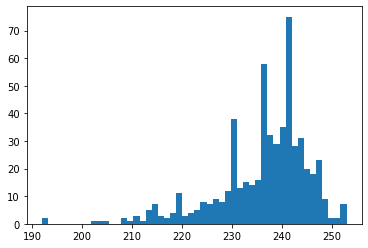

In [4]:
# гистограмма распределения данного признака
plt.hist(data['AVG_MATH_4_SCORE'], 50)
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
# MinMax масштабирование
mms = MinMaxScaler()
sc_data = mms.fit_transform(data[['AVG_MATH_4_SCORE']])

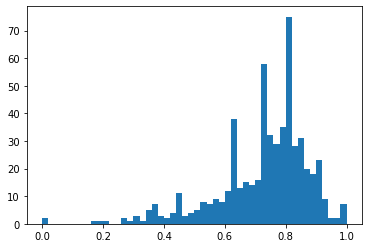

In [7]:
# гистограмма распределения после MinMax масгтабирования данного признака
plt.hist(sc_data, 50)
plt.show()

## Преобразование категориальных признаков в количественные:
### One-hot encoding:
Я использую **one-hot encoding**, потому что этот метод не задает отношение порядка между значениями данного признака.

Например, выполним преобразование для категориального признака "STATE":

In [8]:
# one-hot encoding
pd.get_dummies(data['STATE']).head()

,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT_OF_COLUMBIA,DODEA,...,SOUTH_DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST_VIRGINIA,WISCONSIN,WYOMING
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Label encoding:
Этот метод позволяет не расширять признаковое пространство набора данных.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# исходные уникальные значения данного признака
data['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING', 'DODEA', 'NATIONAL'],
      dtype=object)

In [11]:
# label encoding
le = LabelEncoder()
data_le = le.fit_transform(data['STATE'])

In [12]:
# уникальные значения после label encoding
np.unique(data_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [13]:
# обратное преобразование
le.inverse_transform(data_le)

array(['ALABAMA', 'ALASKA', 'ARIZONA', ..., 'WEST_VIRGINIA', 'WISCONSIN',
       'WYOMING'], dtype=object)

## Построение графика "Ящик с усами (boxplot)":
Отображает одномерное распределение вероятности. Построение графика для колонки данных "AVG_MATH_8_SCORE".

<AxesSubplot:xlabel='AVG_MATH_8_SCORE'>

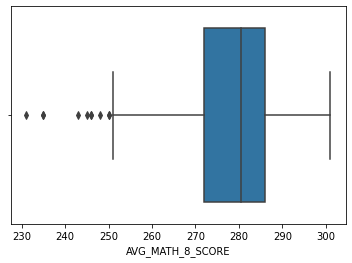

In [14]:
sns.boxplot(x=data['AVG_MATH_8_SCORE'])

<AxesSubplot:ylabel='AVG_MATH_8_SCORE'>

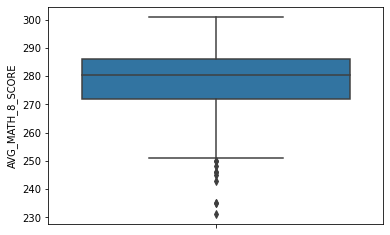

In [15]:
# по вертикали
sns.boxplot(y=data['AVG_MATH_8_SCORE'])